In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# In this lab, we will use numpy, matplotlib.pyplot, pandas and seaborn. 
# The rationale behind importing these libraries and tools is to help with data manipulation and visualisation. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Missing Values:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64 

Data Type:
 crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object 

Number of Duplicates:
 0 

Descriptive Statistics:
              crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284341   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.705587   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.

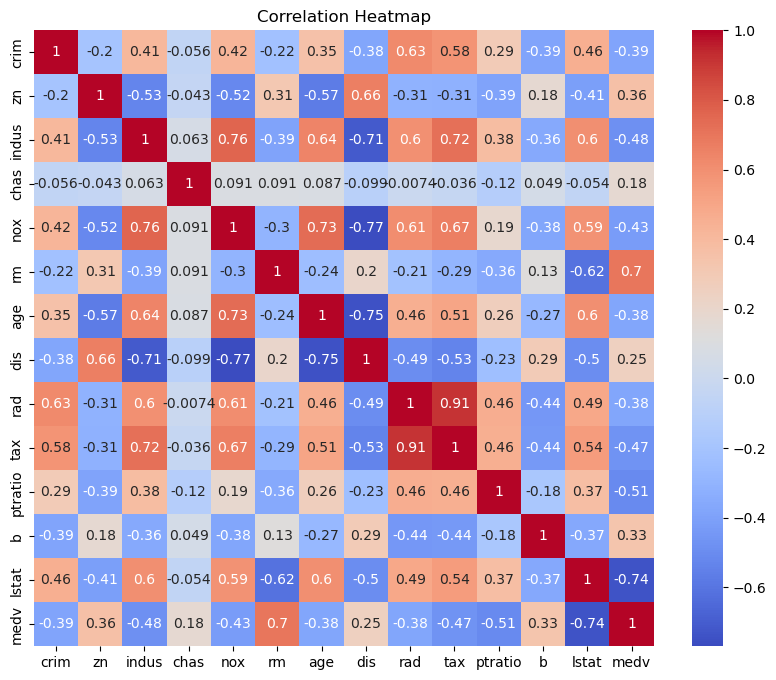

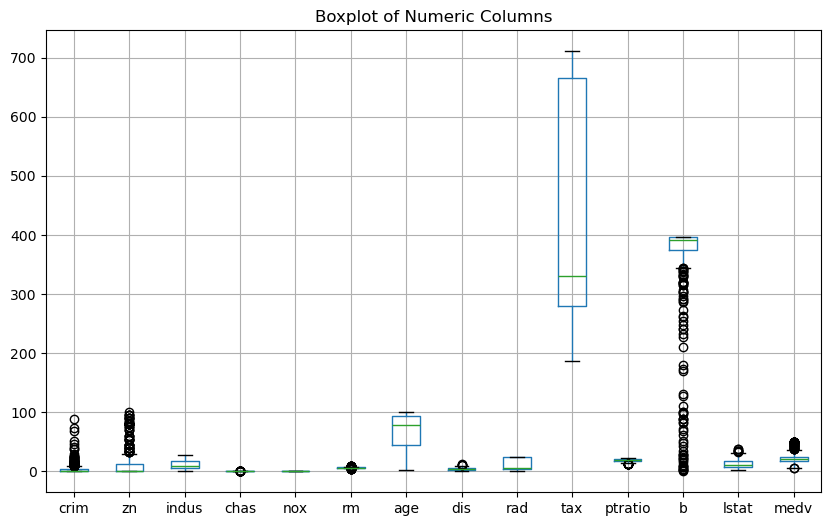

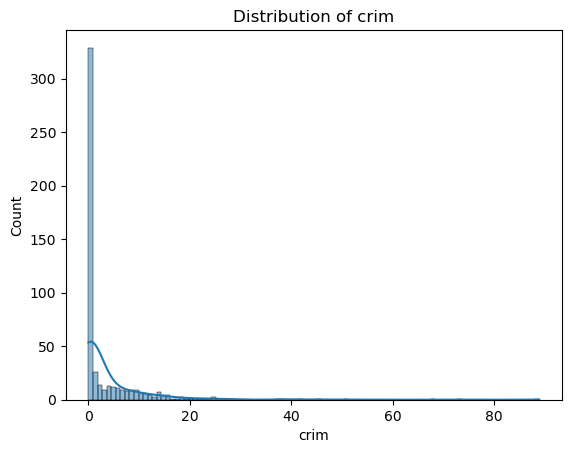

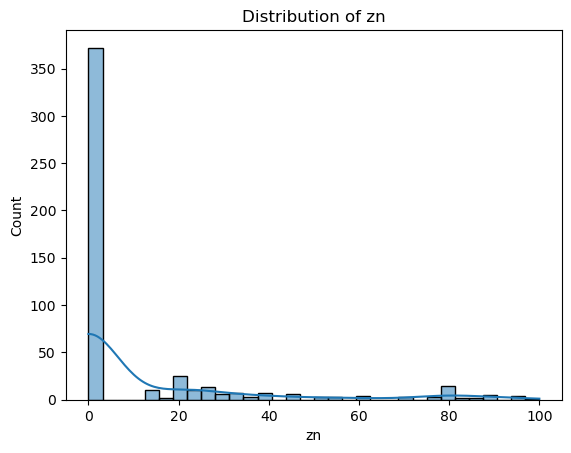

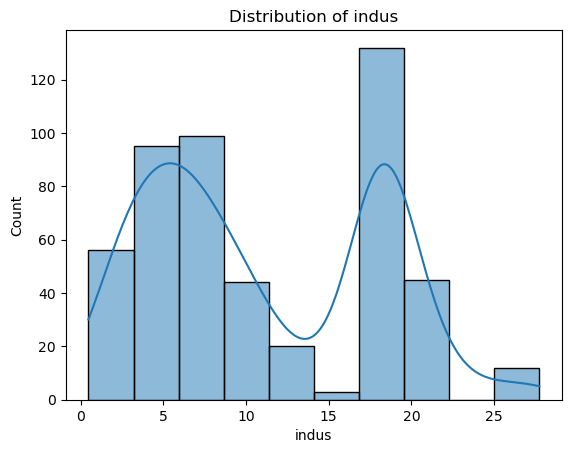

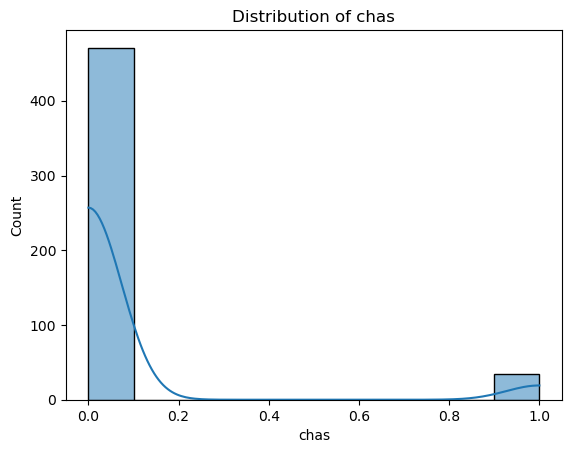

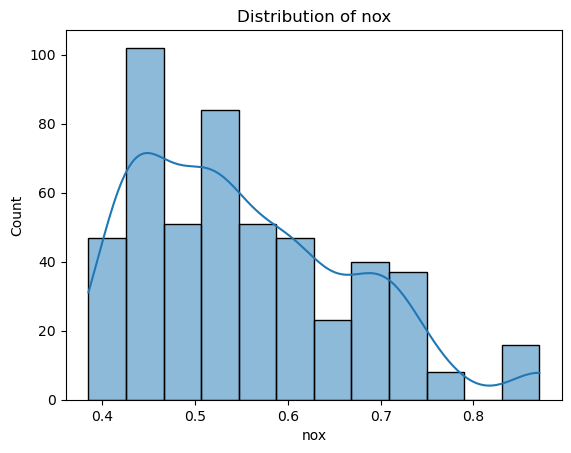

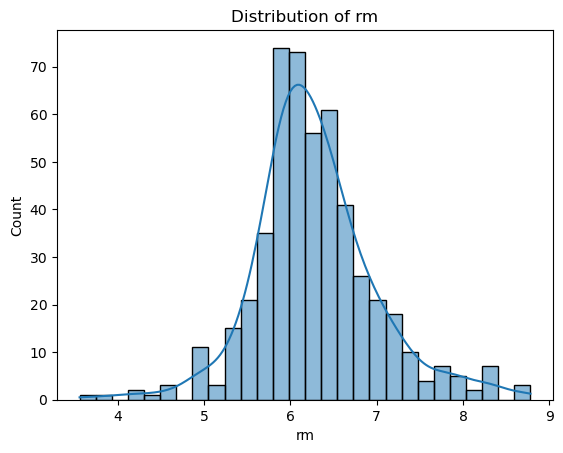

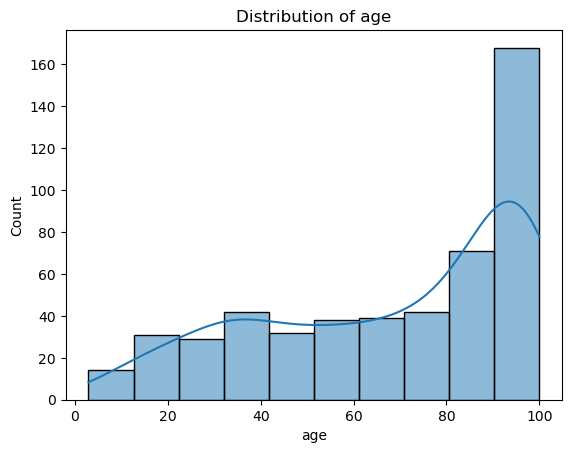

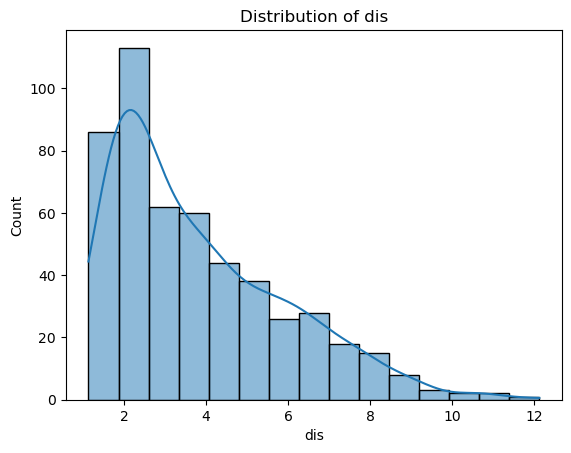

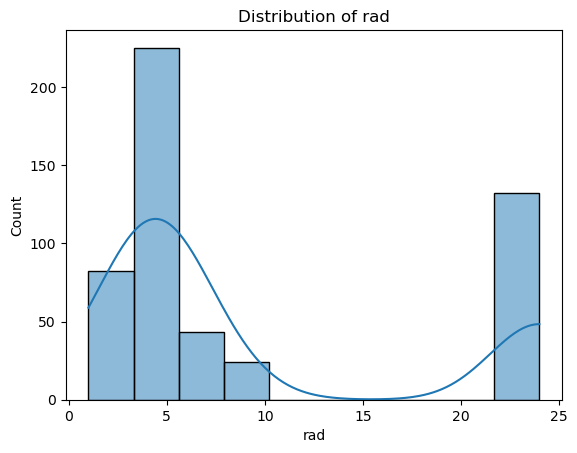

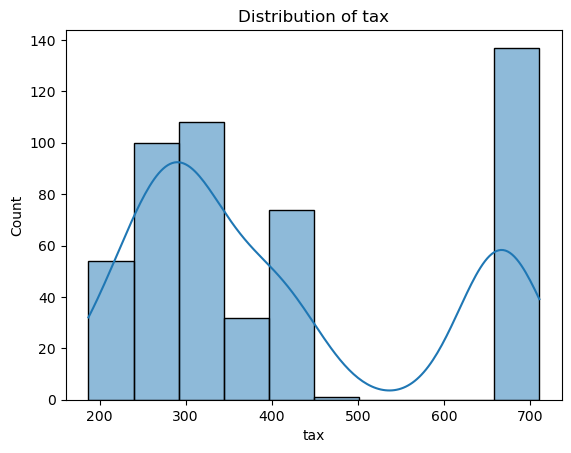

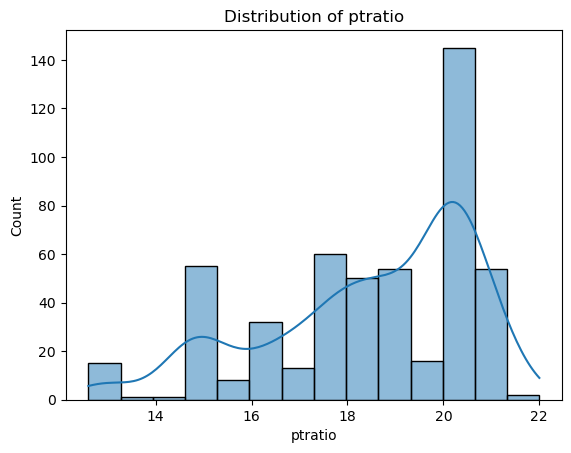

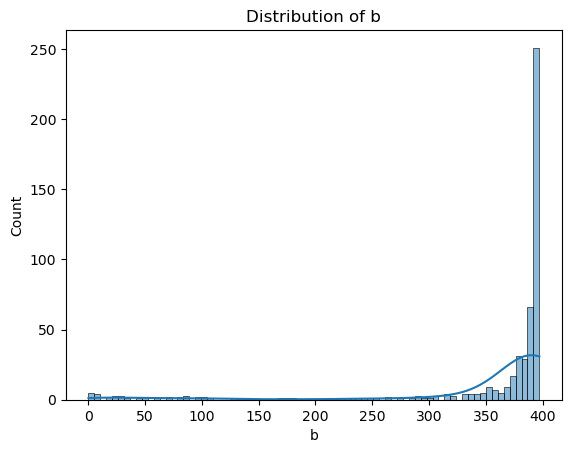

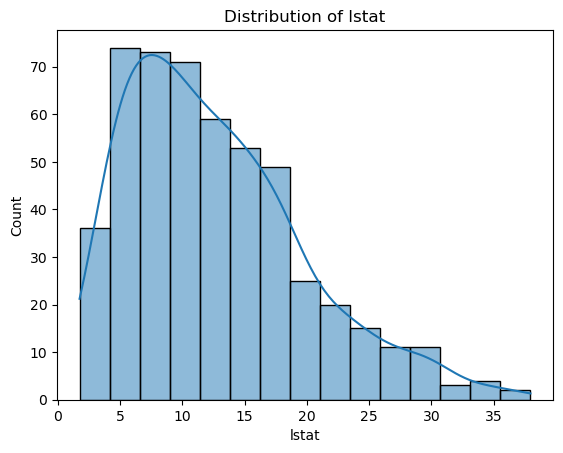

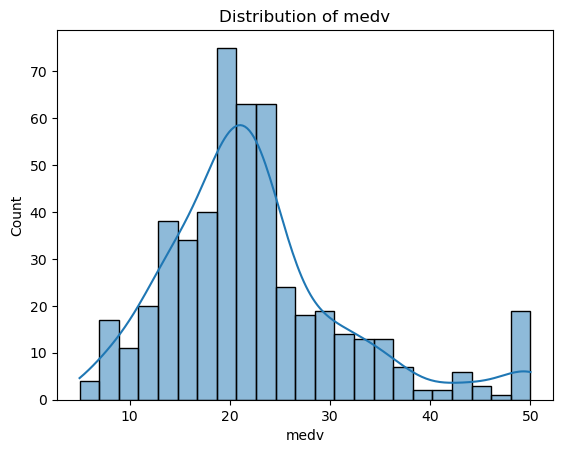

In [5]:
# The first step is to create a function that checks the validity of the data to ensure completeness, timeliness and consistency.
# Our dataset, the Boston Housing dataset, was obtained from the Kaggle website.
# Defining the validate function.
def validate_data(data):
    """
  Performs a comprehensive validation of a pandas data frame to ensure data quality.

  Args:
      data (pandas.DataFrame): The DataFrame to be validated.

  Returns:
      None (This function performs data validation and visualization but does not return a value)

  This function performs the following data validation checks and visualizations:

      1. Missing Values: Identifies and displays the missing values in each column.
      2. Data Types: Shows the data type of each column.
      3. Data Duplicates: Counts and displays the number of duplicate rows in the DataFrame.
      4. Descriptive Statistics: Generates summary statistics for numerical columns (mean, standard deviation, etc.).
      5. Feature Correlations: Calculates and visualizes the correlation matrix to identify potential relationships between features.
      6. Outlier Visualization: Creates boxplots for each numeric column to visualise outliers.
      7. Distribution Visualization: Generates histograms with kernel density estimation (KDE) to visualize the distribution of each numeric column.

  By performing these checks and visualizations, this function provides valuable insights into the data quality and helps identify potential issues before using the data for further analysis or modelling.
  """
    # Check for missing values.
    print("Missing Values:\n", data.isnull().sum(), "\n")
    # Check data types.
    print("Data Type:\n", data.dtypes, "\n")
    # Check for data duplicates
    print("Number of Duplicates:\n", data.duplicated().sum(), "\n")
    # Descriptive Statistics.
    print("Descriptive Statistics:\n", data.describe(), "\n")
    # Check for correlation in the dataset to identify features to be used in training the model.
    print("Feature Correlations:\n", data.corr(), "\n")
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()
    # Visualise outliner for each numeric column
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    data[numeric_columns].boxplot(figsize=(10, 6))
    plt.title("Boxplot of Numeric Columns")
    plt.show()
    # Visualise distribution for each numeric column
    for column in numeric_columns:
        sns.histplot(data[column], kde=True)
        plt.title(f"Distribution of {column}")
        plt.show()
data = pd.read_csv(r"C:\Users\okwuk\OneDrive\Documents\BostonHousing.csv") # Load the data set.
validate_data(data) # Run the validation.

In [6]:
# The validate_data reveled 5 missing dataset from the rm coloumn.
# Dropping rows with missing values is the best apporach as 5 missing rows would not siginficantly reduce the data set size.
data = data.dropna() # Removes any row with as least one NaN

Missing Values:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64 

Data Type:
 crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object 

Number of Duplicates:
 0 

Descriptive Statistics:
              crim          zn       indus        chas         nox          rm  \
count  501.000000  501.000000  501.000000  501.000000  501.000000  501.000000   
mean     3.647414   11.402196   11.160619    0.069860    0.555151    6.284341   
std      8.637688   23.414214    6.857123    0.255166    0.116186    0.705587   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081990    0.000000    5.

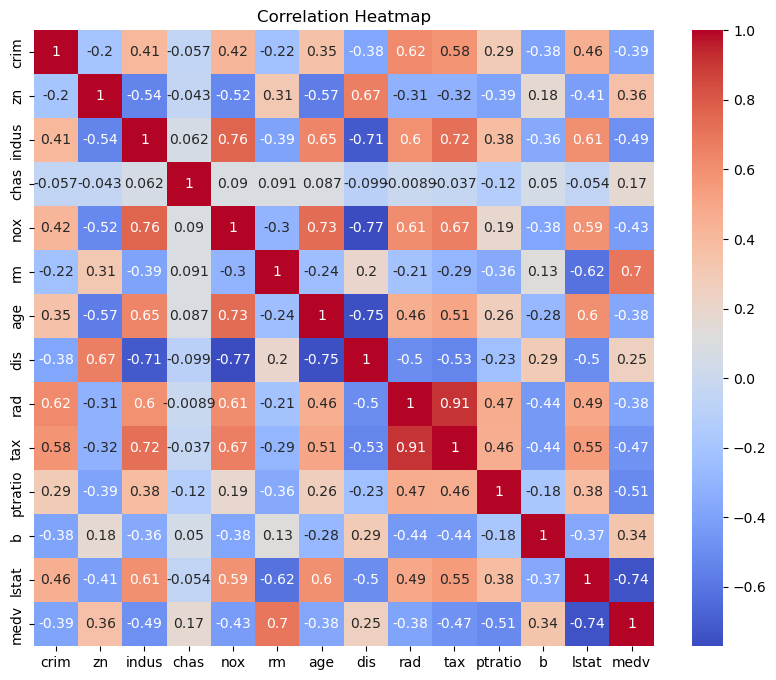

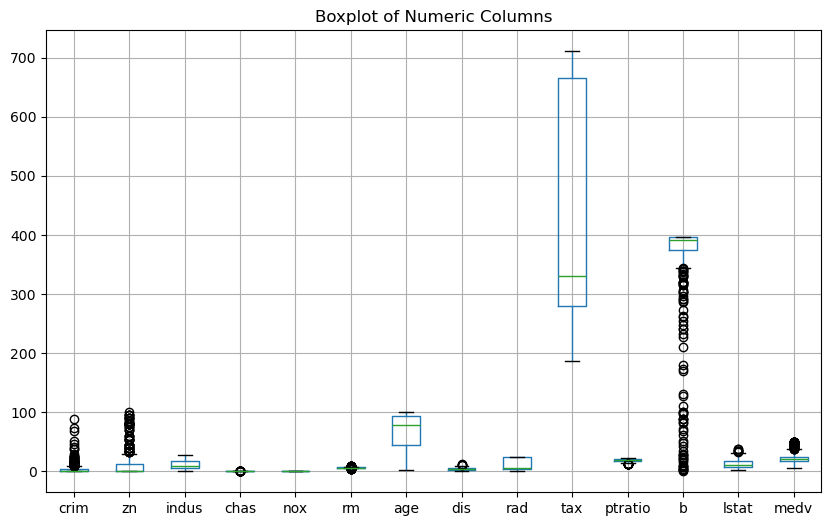

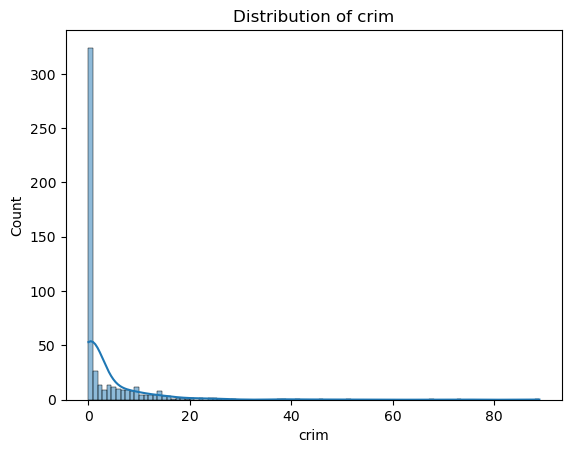

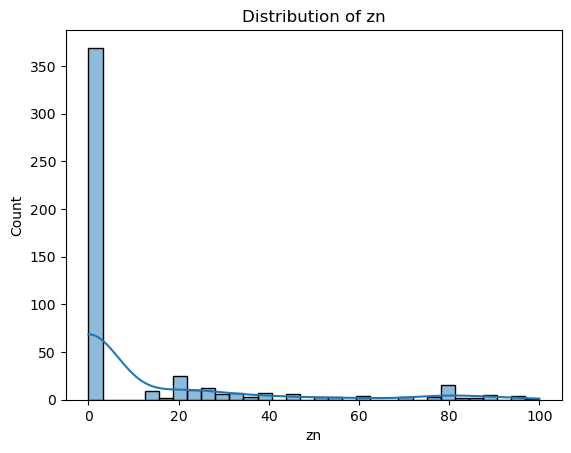

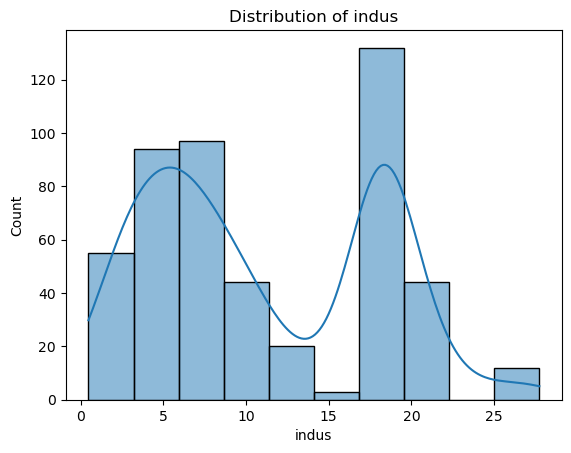

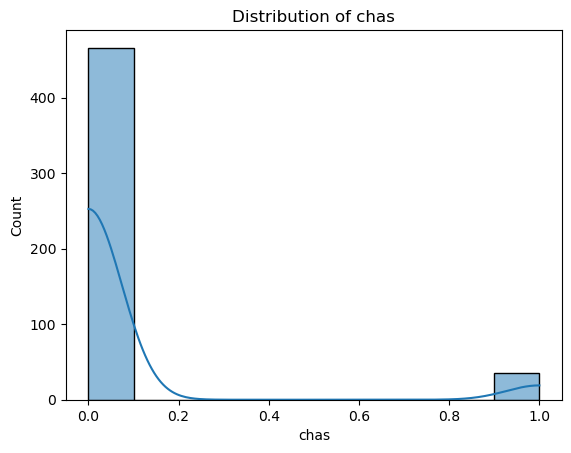

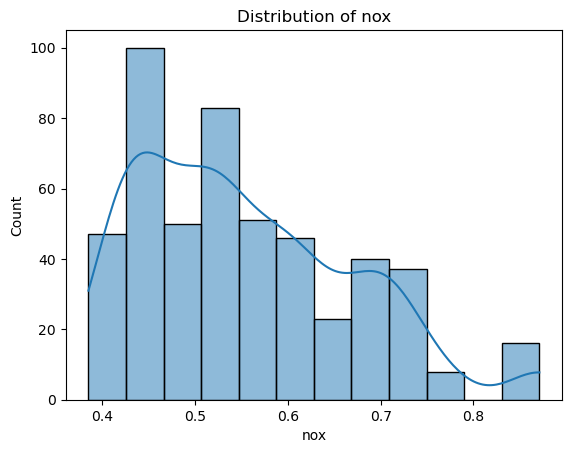

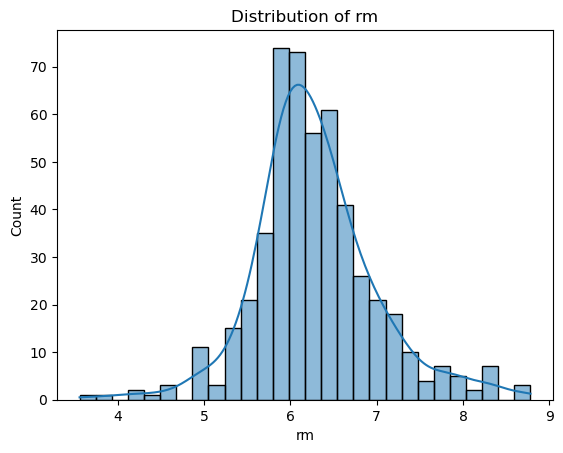

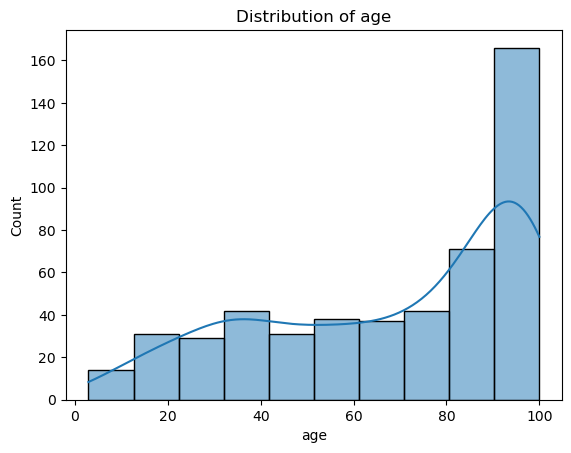

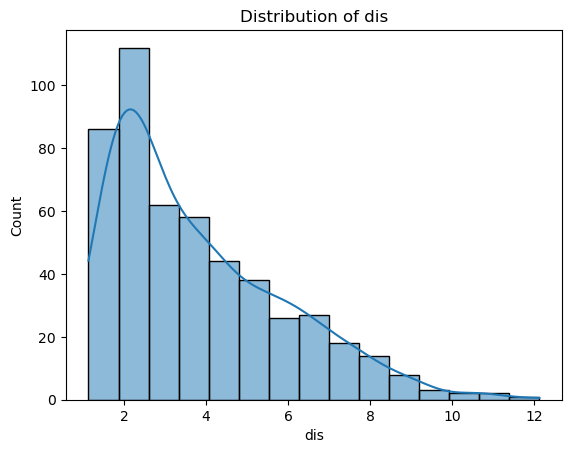

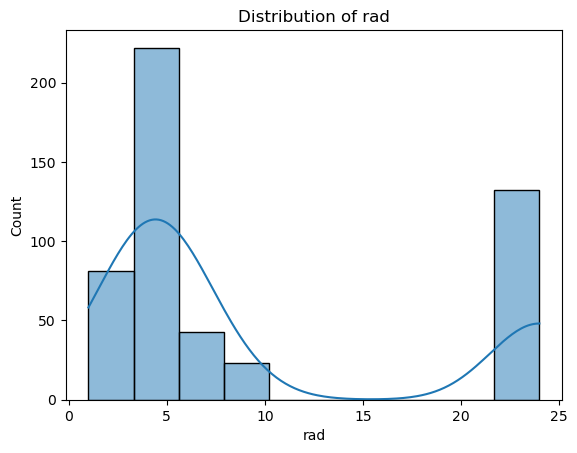

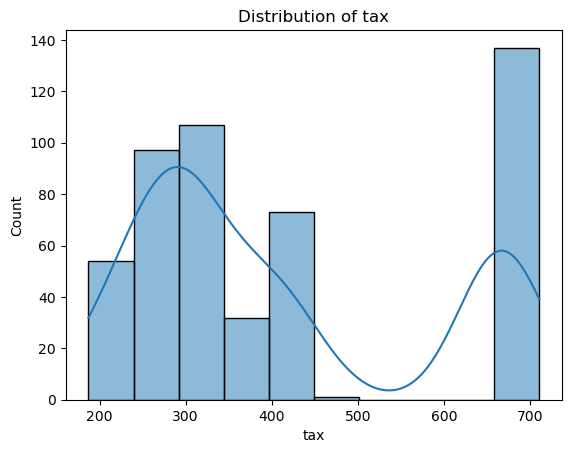

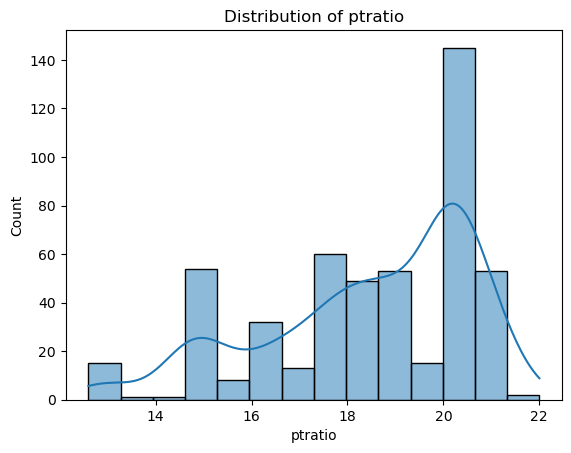

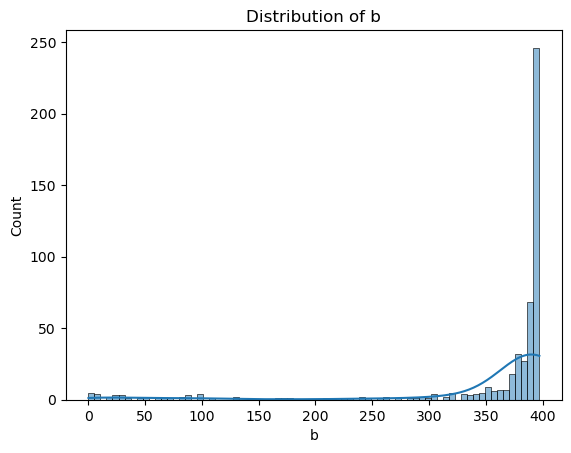

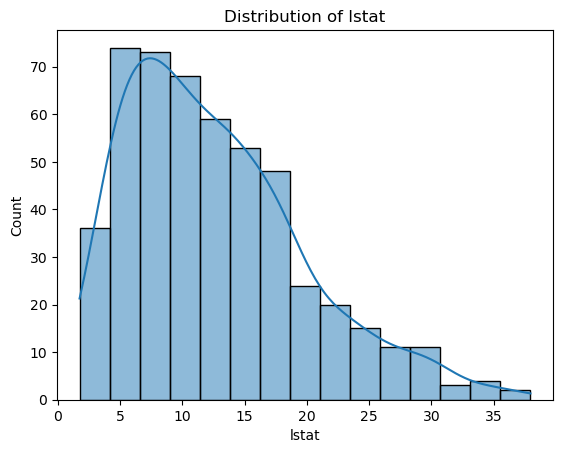

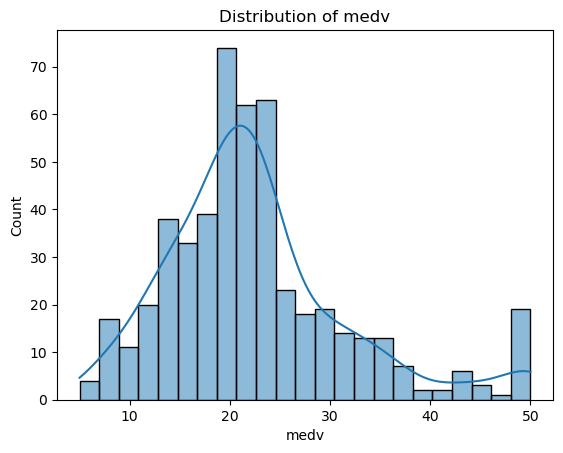

In [7]:
# Running the validate function is ncessary to see if changes have been implemented.
validate_data(data) # Run validation

In [80]:
# Handling severe outliners in specific columns.
data['crim'] = np.log1p(data['crim'])
data['lstat'] = np.log1p(data['lstat'])

# Our Target (y) is medv coloumn.
# In selecting our Features (X), we must carefully examine the feature correlation and the correlation heat map.
# The rationale is that combining strong predictors and managing multicollinearity will lead to building,
# a more accurate and stable linear regression model for house price prediction.
# Also, Domain knowledge would further assist us in selecting features for our linear regression model.
# Therefore, X features are crim, indus, nox, rm, age, rad, tax, ptratio and lstat.
X = data[["crim", "indus", "nox", "rm", "age", "rad", "ptratio", "lstat", "zn", "b"]].values # loading features into X (2-D nparray) "tax"
y = data["medv"].values # and targets into y (1-D nparray)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(X)

X = scaled_data

# Check the shape of X and y before splitting.
print("X shape before splitting into train and test:", X.shape)
print("y Shape before splitting into train and test:", y.shape, "\n")

# Splitting the array into train and test
# The rationale is that splitting before scaling or other transformations prevents data leakage (the test set remains unseen and unbiased).
# The Training Set (X_train, y_train) is Used to train the machine learning model (fitting the model, finding patterns).
# Test Set (X_test, y_test) evaluates your model's performance on unseen data. 
# This helps assess how well your model generalizes, reducing the risk of overfitting.
# This is achieved by using the sklearn.model_selection.
# 0.2 means 20% of the data goes to X_test and y_test, while the remaining 80% goes to X_train and y_train
# random_state=42 is a seed which ensures the split is reproducible, giving you the same subsets each time

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 
)

# Check the shape of X and y after splitting.
print("Train set size after splitting into train and test:", X_train.shape, y_train.shape)
print("Test set size after splitting into train and test:", X_test.shape, y_test.shape, "\n")

# Distinguish m and n for X_train only.
print("Number of training examples(m):", X_train.shape[0])
print("Number of features(n):", X_train.shape[1])

X shape before splitting into train and test: (501, 10)
y Shape before splitting into train and test: (501,) 

Train set size after splitting into train and test: (400, 10) (400,)
Test set size after splitting into train and test: (101, 10) (101,) 

Number of training examples(m): 400
Number of features(n): 10


In [81]:
# Checking data types of both X_train, X_test, y_train and y_test.
print("X_train data type: \n", X_train.dtype)
print("y_train data type: \n", y_train.dtype)
print("X_test data type: \n", X_test.dtype)
print("y_test data type: \n", y_test.dtype)

X_train data type: 
 float64
y_train data type: 
 float64
X_test data type: 
 float64
y_test data type: 
 float64


In [82]:
# Viewing the first 5 rows of our training example.
print(X_train[:5])

[[ 0.83787012  0.651433    0.92571429 -0.21187584  0.09795918  0.95
   0.42857143  0.49989606  0.         -0.61655566]
 [ 0.47925246 -0.12006197  0.         -0.86099865  0.41632653 -0.05
   0.71428571  0.60204879  0.         -0.70266413]
 [-0.02171862 -0.17893106 -0.25714286 -0.16869096 -0.69387755  0.
   0.21428571  0.12483571  0.          0.26450999]
 [-0.3326801  -0.348567   -0.13142857 -0.42240216 -0.36938776  0.
   0.42857143 -0.08272469  0.          0.16508088]
 [-0.12649496 -0.35321456 -0.48571429 -0.08502024 -0.98979592  0.15
   0.25       -0.60660503  2.         -0.03139867]]


In [83]:
# Using the iterative approach is necessary to reinforce learning and is preferred for large or high-dimensional datasets.
# This involves defining the cost function and gradient descent until convergence to get the best values for w and b.
# However, a closed-form solution (scikit-learn) will be used to compare results and performance at the end.
# Carrying out feature scaling is important in an iterative approach, as convergence is faster if features are on similar scales.
# The best approach is to utilise the z-score normalisation technique to carry out feature scaling.
# Start by defining the technique(z-score normalisation).
def zscore_normalise_features(X_train):
    """
    Computes X and uses the zscore technique to normalise the features.

    Args:
        X (ndarray(m,n))   : Input data, m examples, n features

    Returns:
        X_norm (ndarray(m,n))   : Input data norm by column
        mu (ndarray(n,))        : Mean of each feature
        sigma (ndarray(n,))     : Standard deviation of each feature
    """
    #find the mean of each column/feature in the array X.
    mu = np.mean(X_train, axis=0)        # mu will have shape (n,).
    # find the standard deviation of each column/feature.
    sigma = np.std(X_train, axis=0)     # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X_train - mu) / sigma     # zscore normaliseing technique formula.

    return (X_norm, mu, sigma)

#This can be done using a closed-form solution (scikit-learn)
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

In [84]:
X_norm, X_mu, X_sigma = zscore_normalise_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}", "\n")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}", "\n")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")
# The reason scaling features using the zscore normalisation is important can be seen in the output.
# In the original value of X_train, np.ptp(X_train, axis=0) calculates (max-min) for each column before normalisation.
# For instance, 7.352504e+01 = 73.52504 is the range of the first feature from its minimum to its maximum.
# 4.860000e-01 = 0.486 is the range for the third feature and 5.240000e+02 = 524 for the seventh feature.
# You can see some features have much larger numeric ranges than others (e.g., 524 vs. 0.486).
# On the other hand, np.ptp(X_norm, axis=0) calculates (max-min) for each column after you apply z-score normalisation.
# Notice these ranges are generally smaller and more comparable across columns. For instance:
#  9.24 for the first feature, 4.20 for the third, 7.35 for the fourth, etc.
# Why is this important? Models like gradient descent benefit from having features on similar scales.
# If one feature had a huge range (like 524) and another had a tiny range (like 0.486), 
# the large-range feature could dominate the cost function or distance calculations.
# By checking the means, standard deviations, and peak-to-peak ranges, you confirm that your normalization is working as intended, 
# giving each feature comparable influence.

X_mu = [ 0.218227    0.11351665  0.10459714  0.13144062 -0.17544898  0.233375
 -0.20973214 -0.16045377  0.9423     -1.5680138 ], 
X_sigma = [0.49780631 0.53139412 0.66180582 0.9580644  0.56415334 0.43350878
 0.77909652 0.72632379 1.87672766 4.20031324] 

Peak to Peak range by column in Raw        X:[ 1.54800888  2.11309063  2.77714286  7.04318489  1.91836735  1.15
  3.35714286  4.01211504  7.6        18.86679353] 

Peak to Peak range by column in Normalized X:[3.10966099 3.97650358 4.19631075 7.35147336 3.40043605 2.65277213
 4.30902049 5.52386569 4.04960195 4.4917587 ]


In [85]:
print(X_norm.shape[0])
print(X_norm.shape[1])
print(X_norm[:5])

400
10
[[ 1.2447474   1.01227379  1.24072216 -0.35834383  0.48463449  1.65308072
   0.8192869   0.90916729 -0.50209736  0.22652076]
 [ 0.52435145 -0.43955816 -0.15804809 -1.0358795   1.04896217 -0.65367765
   1.18601205  1.04981081 -0.50209736  0.20602027]
 [-0.48200599 -0.55034052 -0.54659538 -0.31326869 -0.91894976 -0.53833974
   0.54424304  0.39278555 -0.50209736  0.43628265]
 [-1.10666957 -0.86956862 -0.35663892 -0.57808513 -0.34376961 -0.53833974
   0.8192869   0.10701712 -0.50209736  0.41261082]
 [-0.6924821  -0.8783146  -0.89197075 -0.22593561 -1.4434851  -0.19232598
   0.59008368 -0.61425947  0.56358737  0.36583346]]


In [86]:
X_train_norm = X_norm # moving the normalise data into X_train_norm
# Verifying the attributes of X_train_norm and y_train is important to ensure compatibility with the algorithm.
# And to also validate data types.
print(X_train_norm.shape)
print(X_train_norm.shape[0])
print(X_train_norm.shape[1])
print(type(X_train_norm))
print(X_train_norm.dtype)
print(y_train.shape)

(400, 10)
400
10
<class 'numpy.ndarray'>
float64
(400,)


In [87]:
# Initialising parameters
m = X_train_norm.shape[0] # moving the training example into m
n = X_train_norm.shape[1] # moving the features into n
w = np.zeros((n,))        # w is the weight of the features, and therefore, it will be initialised to have a format of ndarray with shape n 
b = 0.0                   # b is the bias, which is a single scalar or float figure but should be initialised to 0.0.
alpha = 0.03              
num_iters = 10000

In [88]:
#compute cost function
def compute_cost(X_train_norm, y_train, w, b):
    """
    Compute the cost function for linear regression.

    Args:
            X_train_norm (ndarray,(m,n)) : Norm Input variable with m training examples and n features.
            y_train (ndarray,(m,))       : target variable with shape m.
            w (ndarray,(n,))             : model parameter in an array structure with shape n.
            b (float64)                  : model parameter.

    Returns:
        total_cost (float) : The cost of using w,b as the model parameters for linear regression
            to fit the data point in X and y
    """
    # m = X_train_norm.shape[0] # moving the training examples into m
    cost_sum = 0 
    for i in range(m):
        f_wb = np.dot(X_train_norm[i], w) + b
        cost = (f_wb - y_train[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

In [89]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train_norm, y_train, w, b)
print(f'Cost at pre-chosen optimal parameters : {cost}')

Cost at pre-chosen optimal parameters : 305.9394749999999


In [90]:
# Compute gradient descent
def compute_gradient(X_train_norm, y_train, w, b):
    """
    Compute gradient for linear regression.

     Args:
      X_train_norm (ndarray (m,n)): Data, m examples with n features
      y_train (ndarray (m,))      : target values with shape m
      w (ndarray (n,))            : model parameter in an array structure with shape n  
      b (float64)                 : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        err = (np.dot(X_train_norm[i], w) + b) - y_train[i]
        for j in range(n):
            dj_dw[j] += err * X_train_norm[i, j]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [91]:
#Compute and display gradient 
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train_norm, y_train, w, b)
print(f'dj_db at initial w,b: {tmp_dj_db}')  # Should be a scalar
print(f'dj_dw at initial w,b: \n{tmp_dj_dw}')  # Should be a vector

dj_db at initial w,b: -22.903500000000022
dj_dw at initial w,b: 
[ 3.80384456  4.23963744  3.77366274 -6.52731616  3.22405328  3.30501801
  4.45094066  7.68973898 -3.12996503 -2.94275118]


In [92]:
def gradient_descent (X_train_norm, y_train, w, b, compute_gradient, compute_cost, alpha, num_iters):
    """ 
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
     X_train_norm (ndarray (m,n))   : Data, m examples with n features
     y_train (ndarray (m,))         : target values
     w (ndarray (n,))               : initial model parameters  
     b (scalar)                     : initial model parameter
     cost_function                  : function to compute cost
     gradient_function              : function to compute the gradient
     alpha (float)                  : Learning rate
     num_iters (int)                : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))              : Updated values of parameters 
      b (scalar)                    : The updated value of the parameter 
    """
    total_cost_history = [] # An array to store total_cost_history and w's at each iteration primarily for graphing later
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_dw, dj_db = compute_gradient(X_train_norm, y_train, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i % 100 == 0:
            cost_val = compute_cost(X_train_norm, y_train, w, b)
            total_cost_history.append(cost_val)
            
            print(f"Iteration {i}: Cost={cost_val:.4f}, b={b:.2f}")
            # Printing w as a flattened array for readability
            print(f"w: {w.flatten()}")
    return w, b, total_cost_history
    

In [93]:
w_final, b_final, cost_hist = gradient_descent (X_train_norm, y_train, w, b, compute_gradient, compute_cost, alpha, num_iters)

Iteration 0: Cost=284.6174, b=0.69
w: [-0.11411534 -0.12718912 -0.11320988  0.19581948 -0.0967216  -0.09915054
 -0.13352822 -0.23069217  0.09389895  0.08828254]
Iteration 100: Cost=11.0445, b=21.85
w: [ 0.10536883 -0.13198812 -0.34414208  3.04717243  0.55924631  0.10722108
 -1.71668702 -4.6317752  -0.49487033  1.17483998]
Iteration 200: Cost=10.1171, b=22.85
w: [ 1.40354330e-01 -6.38755149e-04 -6.12583512e-01  2.66397000e+00
  8.98000984e-01  2.59351428e-01 -1.78813053e+00 -5.41733534e+00
 -7.09659547e-01  1.19467116e+00]
Iteration 300: Cost=10.0169, b=22.90
w: [ 0.11780063  0.03988775 -0.80011616  2.40491303  1.11692043  0.36127957
 -1.84639297 -5.76163603 -0.75429331  1.14503173]
Iteration 400: Cost=9.9844, b=22.90
w: [ 0.08259717  0.0582747  -0.91721899  2.26301613  1.2605376   0.43838079
 -1.88693703 -5.93588714 -0.76658706  1.1118793 ]
Iteration 500: Cost=9.9729, b=22.90
w: [ 0.0457087   0.06970816 -0.98805535  2.18467184  1.35064149  0.496645
 -1.9141386  -6.02869948 -0.77127467 

In [94]:
# 5. Print results
print("\nAfter gradient descent:")
print(f"w: {w_final.flatten()}")
print(f"b: {b_final:.2f}")
print(f"Final cost: {compute_cost(X_train_norm, y_train, w_final, b_final):.4f}")


After gradient descent:
w: [-0.15463949  0.10096979 -1.06870198  2.07262656  1.50069181  0.68780595
 -1.97485774 -6.15365126 -0.78495761  1.0588268 ]
b: 22.90
Final cost: 9.9647


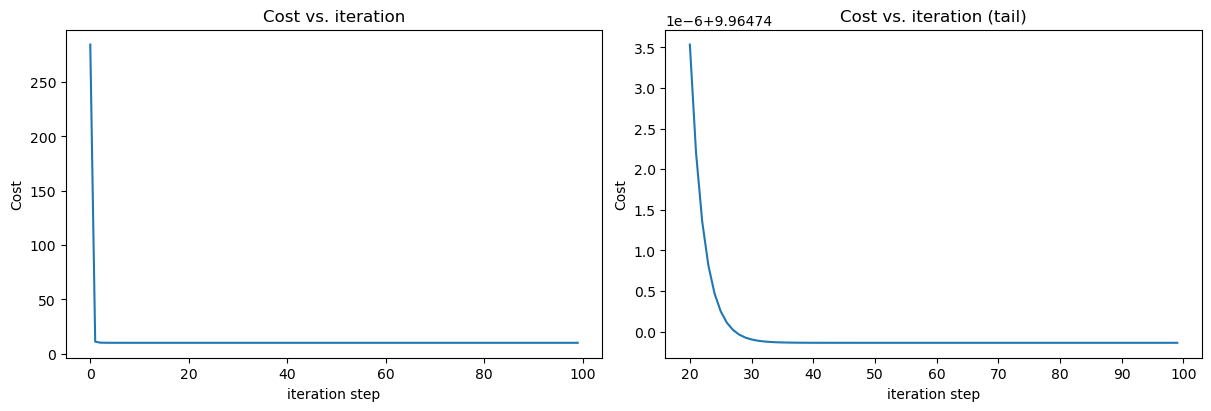

In [95]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(cost_hist)
ax2.plot(20 + np.arange(len(cost_hist[20:])), cost_hist[20:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()
# Below is a line-by-line explanation of what the code is doing and why it is written this way.
# The goal is to plot the cost function (error) over iterations of gradient descent,
# allowing you to visualize how the cost evolves as training progresses
# both from the start and focusing on the later part (the “tail”)

In [96]:
# using sklearn to confirm the values of the iteration method for linear regression.
# the value for b is the same, and so are the values for w.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_norm, y_train)
print("Scikit-learn w:", model.coef_)
print("Scikit-learn b:", model.intercept_)

Scikit-learn w: [-0.15463949  0.10096979 -1.06870198  2.07262656  1.50069181  0.68780595
 -1.97485774 -6.15365126 -0.78495761  1.0588268 ]
Scikit-learn b: 22.903499999999994


In [97]:
# Normalising the X_test to test our model.
def zscore_normalise_features(X_test):
    """
    Computes X_test and uses the zscore technique to normalise the features.

    Args:
        X_test (ndarray(m,n))   : Input data, m examples, n features

    Returns:
        sigma (ndarray(n,))     : Standard deviation of each feature
    """
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_test_norm1 = (X_test - X_mu) / X_sigma     # zscore normaliseing technique formula.

    return (X_test_norm1)

In [98]:
X_test_norm = zscore_normalise_features(X_test)

In [99]:
y_pred = np.dot(X_test_norm, w_final) + b_final # making final prediction

In [100]:
for i in range(10):  # First 10 predictions
    print(f"Predicted: {y_pred[i]:.2f}, Actual: {y_test[i]:.2f}")

Predicted: 11.03, Actual: 23.10
Predicted: 22.50, Actual: 20.00
Predicted: 20.28, Actual: 10.40
Predicted: 33.10, Actual: 27.00
Predicted: 21.50, Actual: 19.80
Predicted: 14.41, Actual: 5.60
Predicted: 13.63, Actual: 12.30
Predicted: 18.34, Actual: 18.00
Predicted: 19.96, Actual: 21.70
Predicted: 11.48, Actual: 12.70


In [101]:
# Checking the performance of our model.
# I believe our model can perform better.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test  = r2_score(y_test, y_pred)

print(f"Test MSE: {mse_test:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Test R² : {r2_test:.2f}")

Test MSE: 20.69
Test MAE: 3.38
Test R² : 0.72


In [102]:
# using sklearn to check if our model generalises adequately.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_train_pred = model.predict(X_train_norm)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train  = r2_score(y_train, y_train_pred)

print(f"Training MSE: {mse_train:.2f}")
print(f"Training MAE: {mae_train:.2f}")
print(f"Training R² : {r2_train:.2f}")

Training MSE: 19.93
Training MAE: 3.15
Training R² : 0.77


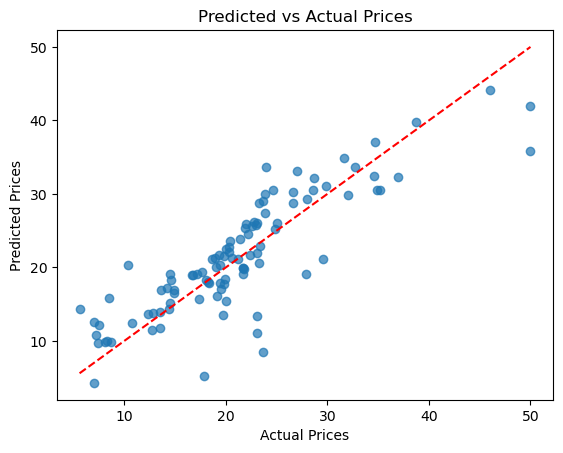

In [103]:
# Plotting the predicted values vs actual values.
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices")
plt.show()

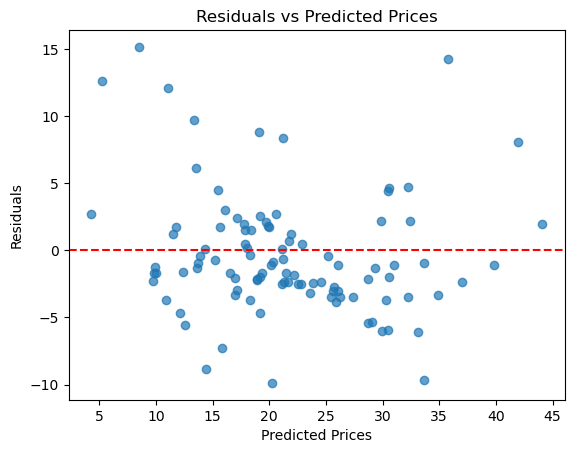

In [104]:
# This is a Residuals vs Predicted Prices plot, which is used to evaluate the performance of the regression model.
# The model performs reasonably well, as the residuals are randomly distributed and centred around 0
# The residuals appear to be randomly scattered around the red dashed line.
# This suggests that the model's predictions are unbiased and do not systematically overestimate or underestimate the target variable.
# The residuals have no clear curve or trend, indicating that the model captures the relationship between features and targets reasonably well.
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices")
plt.show()

In [38]:
# There were no changes to the cost j and the derivative of w and b.
# We can assume our model generalises adequately, and there is no presence of overfitting or underfitting.